# Climate Projection - Homework 2 : Impacts and exposure, thoughts on vulnerability


The aim of this homework is to go from the territories where heat extremes increase under
climate change (where previous homework left us) to the population exposed and vulnerable
to these extremes.

To do so, you have access to a number of maps, and the underlying spatial data, pre-
formatted to be in the same resolution (0.5◦ * 0.5◦ - beware : the gridcell area vary with
latitude...).

## Given material for analysis

### Install party !

#### Install/import usefull libraries

Before we begin, we must install/import some libraries.

!pip install rasterio geopandas matplotlib numpy

### Import the installed package

In [1]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np
from rasterio.transform import xy

## Some useful functions

Feel free to make the following functions your own and use them in the rest of the assignment.

### Limit to a certain region - to be recoded

### Threshold function
Let us now define a threshold function that crops a map given a certain threshold and display only the raster points below, or over this threshold. This function crops any map based on hdi_data. Feel free to re-code it based on other initial data.

In [2]:
def plot_with_threshold(data_to_crop, hdi_data, threshold, sign):
    """
    sign is a str 'sup' or 'inf'
    """
    masked_data = np.copy(data_to_crop)
    # Utilisation de np.where pour identifier et remplacer les valeurs supérieures au seuil
    if sign == 'inf':
        masked_data[np.where(hdi_data > threshold)] = np.nan
    elif sign == 'sup':
        masked_data[np.where(hdi_data < threshold)] = np.nan
    else:
        print("sign value must be 'inf' or 'sup'")
    return masked_data


In [3]:
import cartopy
import cartopy.crs as ccrs

def mapplot(dataset, lons, lats, titl = "Fill a Title",labl = "Fill a label", cmaph = 'RdYlGn_r', vmin = -1, vmax = -1, maskOcean = True):
    if vmax < 0 : #check if assigned
        vmin = np.nanmin(dataset)
        vmax = np.nanmax(dataset)
    fig = plt.figure(figsize = (18,9))
    ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0.))
    plt.contourf(lons, lats, dataset, 21,transform=ccrs.PlateCarree(),cmap=cmaph, vmin = vmin, vmax = vmax)
    plt.colorbar(label = labl)
    if maskOcean:
        ax.add_feature(cartopy.feature.OCEAN, zorder=100, edgecolor='k')
    ax.coastlines()
    plt.title(titl)
    plt.show()                                        


        
        

## Visualize heatwaves for different warming levels

In [4]:
# Load the raster files
hw1p5_path = 'data/wsdiETCCDI_rcp85_90_6_15.tif'
hw2p0_path = 'data/wsdiETCCDI_rcp85_90_6_20.tif'
hw3p0_path = 'data/wsdiETCCDI_rcp85_90_6_30.tif'
with rasterio.open(hw1p5_path) as src:
    hw1p5_data = src.read(1)  # read the first band
    hw1p5_affine = src.transform
with rasterio.open(hw2p0_path) as src:
    hw2p0_data = src.read(1)  # read the first band
with rasterio.open(hw3p0_path) as src:
    hw3p0_data = src.read(1)  # read the first band
    # Get the dimensions of the raster
    rows, cols = hw3p0_data.shape

    # Create lists to hold the coordinates
    lons = []
    lats = []

    # Loop through each pixel in the raster
    for row in range(rows):
        lon, lat = xy(hw1p5_affine, row, 1)
        lats.append(lat)
    for col in range(cols):
        lon, lat = xy(hw1p5_affine, 1, col)
        lons.append(lon)

In [5]:
print(lons)
print(lats)

[np.float64(-179.75), np.float64(-179.25), np.float64(-178.75), np.float64(-178.25), np.float64(-177.75), np.float64(-177.25), np.float64(-176.75), np.float64(-176.25), np.float64(-175.75), np.float64(-175.25), np.float64(-174.75), np.float64(-174.25), np.float64(-173.75), np.float64(-173.25), np.float64(-172.75), np.float64(-172.25), np.float64(-171.75), np.float64(-171.25), np.float64(-170.75), np.float64(-170.25), np.float64(-169.75), np.float64(-169.25), np.float64(-168.75), np.float64(-168.25), np.float64(-167.75), np.float64(-167.25), np.float64(-166.75), np.float64(-166.25), np.float64(-165.75), np.float64(-165.25), np.float64(-164.75), np.float64(-164.25), np.float64(-163.75), np.float64(-163.25), np.float64(-162.75), np.float64(-162.25), np.float64(-161.75), np.float64(-161.25), np.float64(-160.75), np.float64(-160.25), np.float64(-159.75), np.float64(-159.25), np.float64(-158.75), np.float64(-158.25), np.float64(-157.75), np.float64(-157.25), np.float64(-156.75), np.float64(-

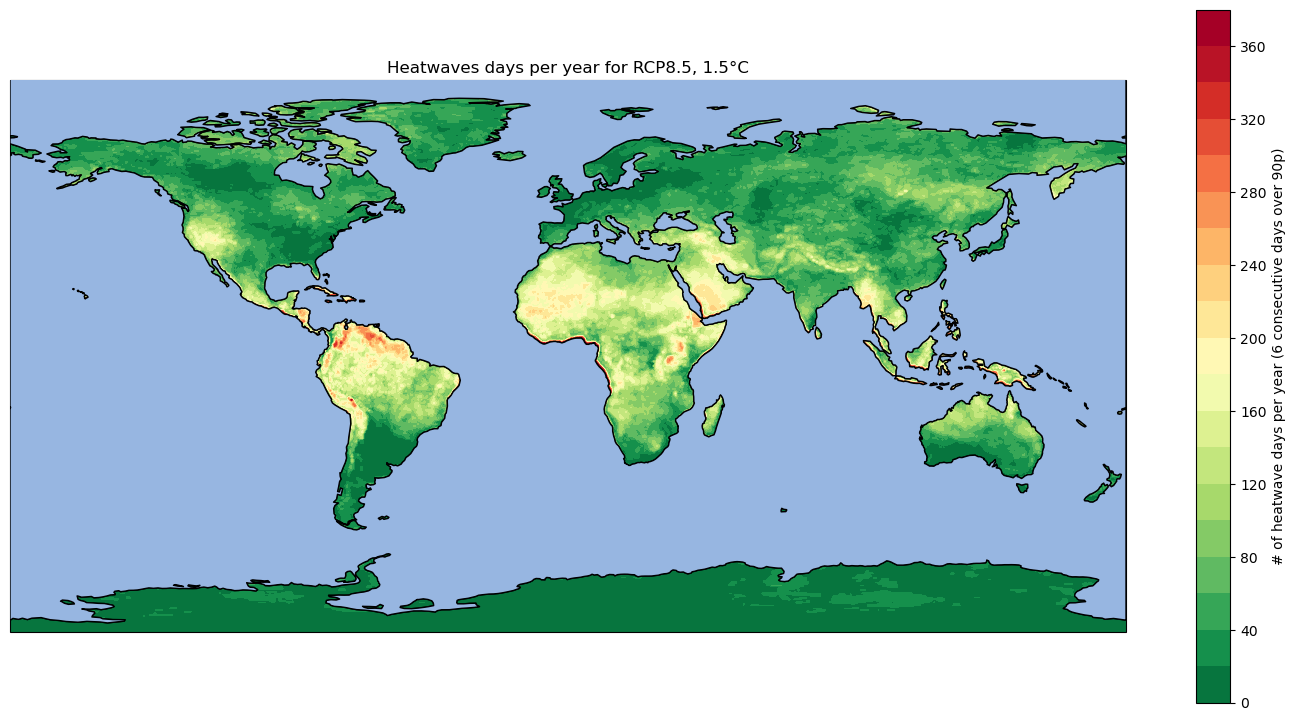

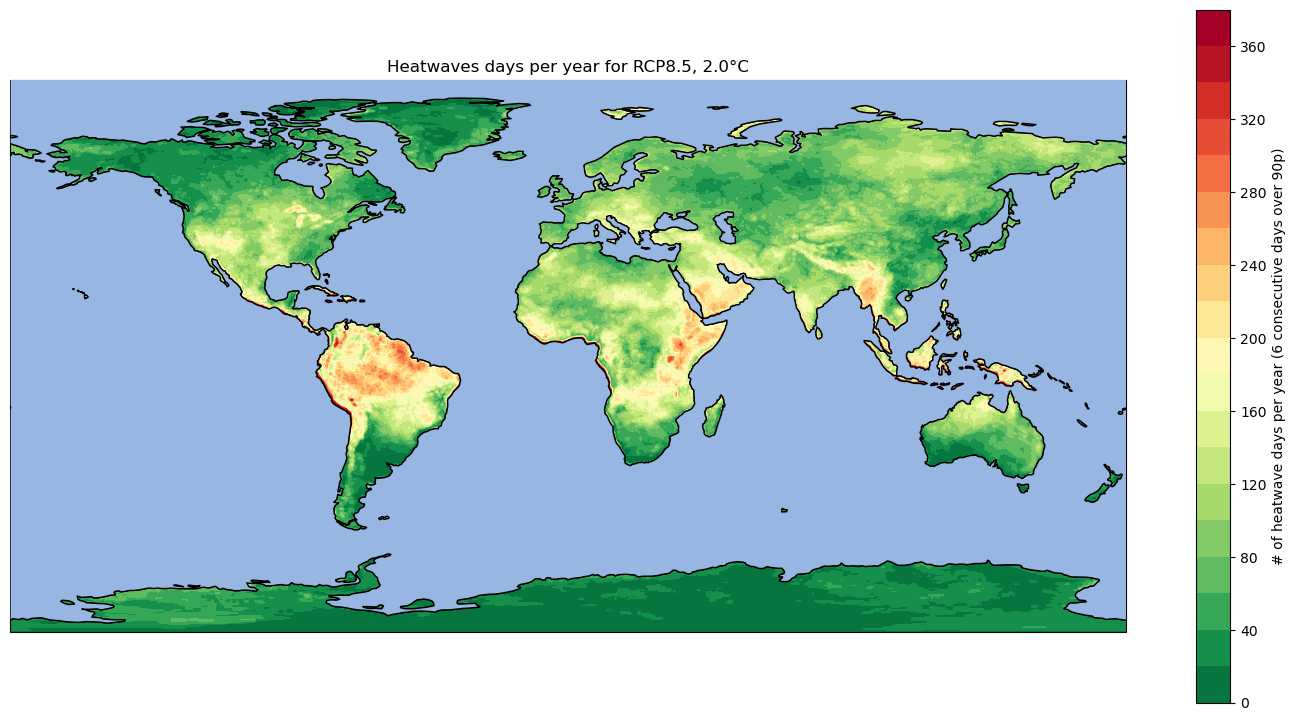

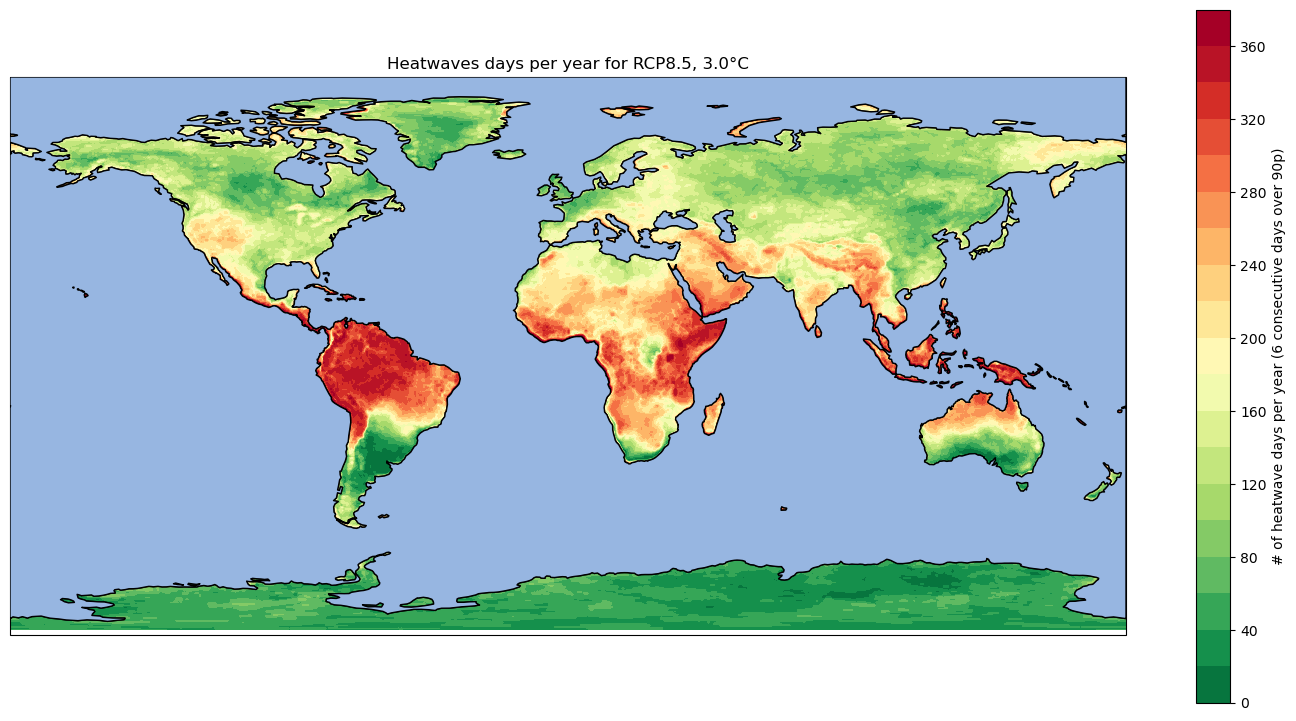

In [6]:

mapplot(hw1p5_data, lons, lats, titl = "Heatwaves days per year for RCP8.5, 1.5°C", labl = "# of heatwave days per year (6 consecutive days over 90p)" )
mapplot(hw2p0_data, lons, lats, titl = "Heatwaves days per year for RCP8.5, 2.0°C", labl = "# of heatwave days per year (6 consecutive days over 90p)" )
mapplot(hw3p0_data, lons, lats, titl = "Heatwaves days per year for RCP8.5, 3.0°C", labl = "# of heatwave days per year (6 consecutive days over 90p)" )

## Visualization of the different geodata sets

The smallest original grid dimension is that of the heatwaves, so we'll translate all the others into this one. You have at your disposal in the hwfiles and resampled grids folders all the geographic data with the same dimensions (np.array of size 360\*720, i.e. cells of size 0.5°\*0.5°).

### HDI geodataset

Let us take a look to this HDI geodataset from the [Mosaiks](https://www.mosaiks.org/hdi) project. The informations provided by the authors include : 
- These are the predictions generated from the machine learning model combining MOSAIKS daytime image and nightlight (NL) features
- These predictions are clipped to have values that fall within 0 and 1.				
- These estimates are centered such that the population-weighted average of the 0.01 x 0.01 degree tile HDI estimates matches the ADM1 data from Smits and Permanyer (https://globaldatalab.org/shdi).
- Population weights come from the Global Human Settlement Data (GHS-POP) (https://ghsl.jrc.ec.europa.eu/download.php?ds=pop).
- Note that we only release estimates where human settlements are known to exist.

The initial dataset has a resolution of 0.1 x 0.1 degree, and raster extent of [-180°, 180°, -56°, 74°] and was processed for this notebook to match the other resolution and projection.




In [7]:
# Load the raster file
hdirs_path = 'data/hdi_resamplednear.tif'
with rasterio.open(hdirs_path) as src:
    hdirs_data = src.read(1)  # read the first band
    hdirs_affine = src.transform # Load the raster file
    # Get the dimensions of the raster
    rows, cols = hdirs_data.shape

    # Create lists to hold the coordinates
    lons_hdi = []
    lats_hdi = []
    #lats_hdi = np.flip(np.arange(-89.75, 90, 0.5)).tolist()

    # Loop through each pixel in the raster
    for row in range(rows):
        lon, lat = xy(hdirs_affine, row, 1)
        lats_hdi.append(lat)
    for col in range(cols):
        lon, lat = xy(hdirs_affine, 1, col)
        lons_hdi.append(lon)

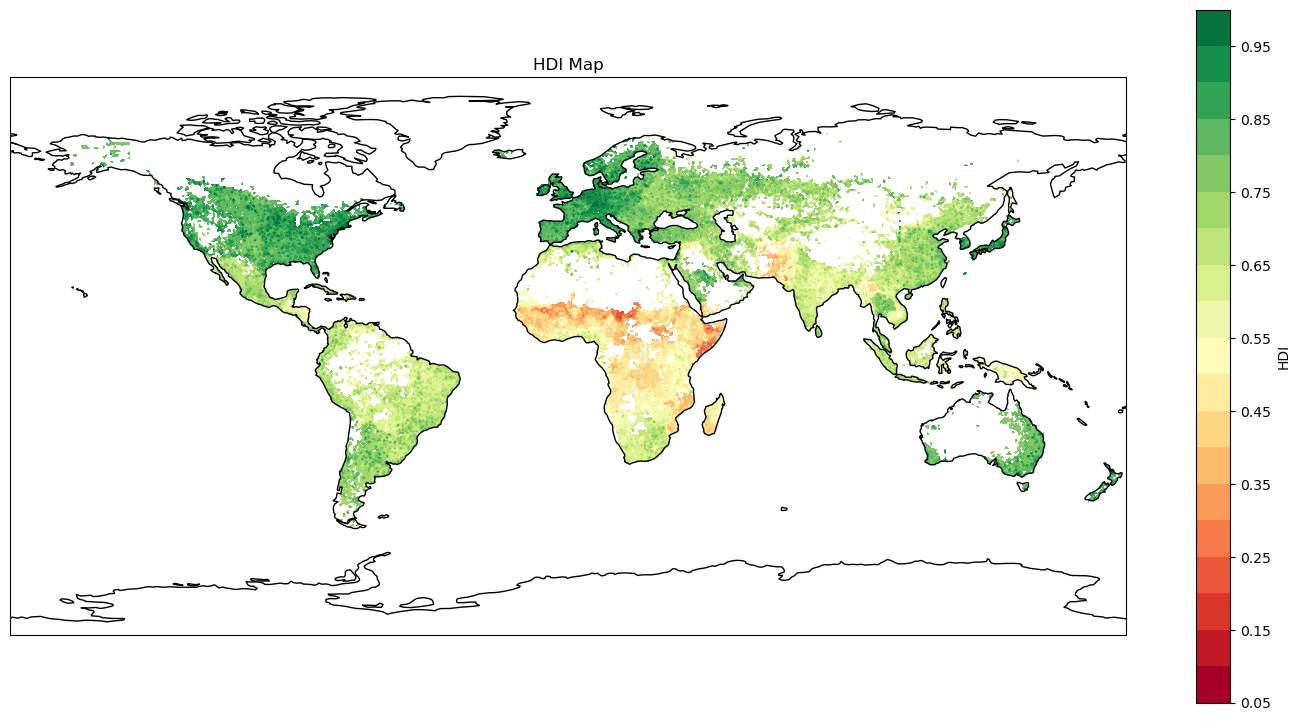

In [8]:
mapplot(hdirs_data, lons_hdi, lats_hdi, titl = 'HDI Map', labl = 'HDI', cmaph = 'RdYlGn', maskOcean = False)

### Cropped HDI map

In [9]:
low_hdi_data = plot_with_threshold(hdirs_data, hdirs_data, .5, "inf")
high_hdi_data = plot_with_threshold(hdirs_data, hdirs_data, .7, "sup")

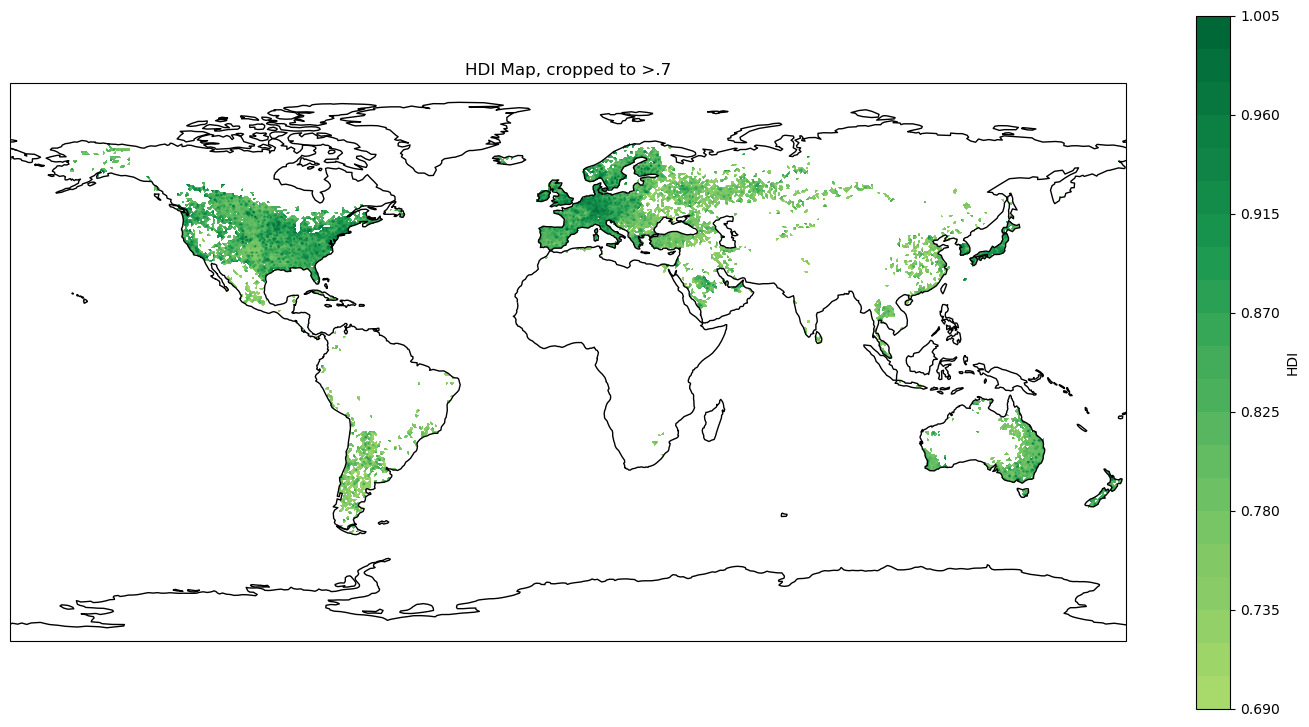

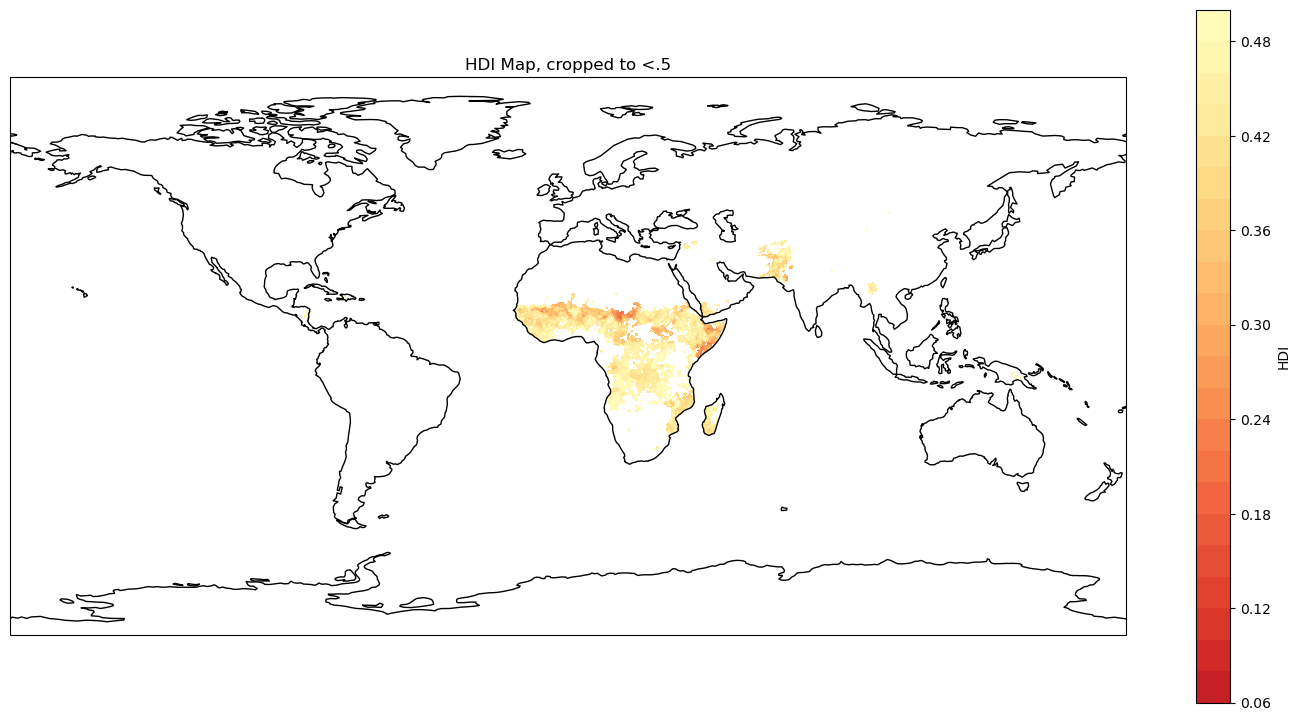

In [10]:
mapplot(high_hdi_data, lons_hdi, lats_hdi, titl = 'HDI Map, cropped to >.7', labl = 'HDI', cmaph= "RdYlGn", vmin = 0, vmax = 1, maskOcean = False)
mapplot(low_hdi_data, lons_hdi, lats_hdi, titl = 'HDI Map, cropped to <.5', labl = 'HDI', cmaph= "RdYlGn", vmin = 0, vmax = 1, maskOcean = False)

### Population density geodataset

For the population density, the [SEDAC dataset](https://sedac.ciesin.columbia.edu/data/set/gpw-v4-population-density-rev11/data-download) was used for the year 2020 : Center for International Earth Science Information Network - CIESIN - Columbia University. 2018. Gridded Population of the World, Version 4 (GPWv4): Population Density, Revision 11. Palisades, New York: NASA Socioeconomic Data and Applications Center (SEDAC). https://doi.org/10.7927/H49C6VHW. Accessed 04/24. The data has been resampled too to match the right resolution using, also nearest resampling method.


In [11]:
# Load the raster file
poprs_path = 'data/pop_resampled.tif'
with rasterio.open(poprs_path) as src:
    poprs_data = src.read(1)  # read the sixth band
    poprs_affine = src.transform# Load the raster file
    # Get the dimensions of the raster
    rows, cols = poprs_data.shape

    # Create lists to hold the coordinates
    lons_pop = []
    lats_pop = []

    # Loop through each pixel in the raster
    for row in range(rows):
        lon, lat = xy(poprs_affine, row, 1)
        lats_pop.append(lat)
    for col in range(cols):
        lon, lat = xy(poprs_affine, 1, col)
        lons_pop.append(lon)

poprs_data[np.where(poprs_data <= 0)] = np.nan #Reformat data, map creators used -3.402823e+38 as np.nan

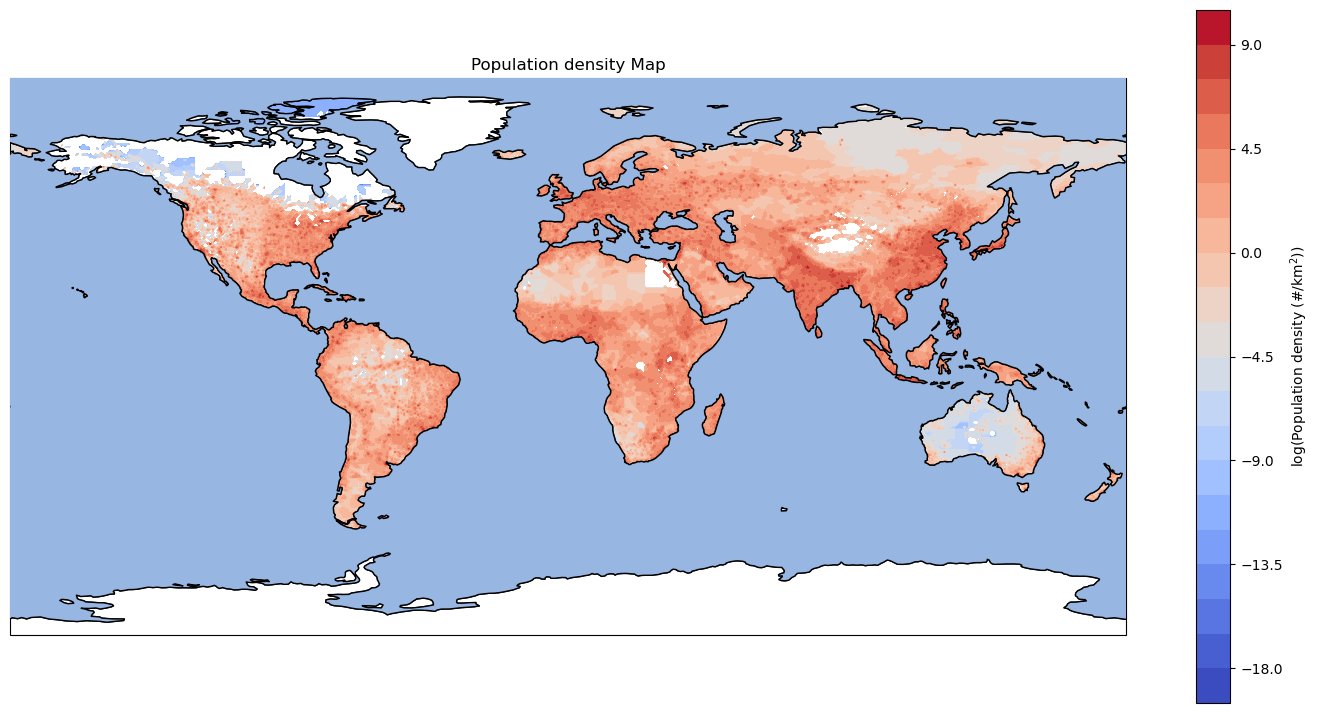

In [12]:
mapplot(np.log(poprs_data), lons_pop, lats_pop, titl = 'Population density Map', labl = r'log(Population density (#/km$^2$))', cmaph = "coolwarm", maskOcean = True)

### GDP per capita geodataset

Source : Kummu M, Taka M, Guillaume JHA. Gridded global datasets for Gross Domestic Product and Human Development Index over 1990-2015. Sci Data. 2018 Feb 6;5:180004. doi: 10.1038/sdata.2018.4

> "We present gap-filled multiannual datasets in gridded form for Gross Domestic Product (GDP) [...]. To provide a consistent product over time and space, the sub-national data were only used indirectly, scaling the reported national value and thus, remaining representative of the official statistics. This resulted in annual gridded datasets for GDP per capita (PPP), total GDP (PPP), and HDI, for the whole world at 5 arc-min resolution for the 25-year period of 1990–2015. Additionally, total GDP (PPP) is provided with 30 arc-sec resolution for three time steps (1990, 2000, 2015)."

We then resampled this data product to match the resolution and projection of the other datasets.

In [13]:
# Load the raster file
gdpprs_path = 'data/gdp2015_resampled.tif'
with rasterio.open(gdpprs_path) as src:
    gdpprs_data = src.read(26)  # read the 26th band, where the 2015 data is situated
    gdpprs_affine = src.transform# Load the raster file
    # Get the dimensions of the raster
    rows, cols = gdpprs_data.shape

    # Create lists to hold the coordinates
    lons_gdp = []
    lats_gdp = []

    # Loop through each pixel in the raster
    for row in range(rows):
        lon, lat = xy(gdpprs_affine, row, 1)
        lats_gdp.append(lat)
    for col in range(cols):
        lon, lat = xy(gdpprs_affine, 1, col)
        lons_gdp.append(lon)
gdpprs_data[np.where(gdpprs_data <= 0)] = np.nan

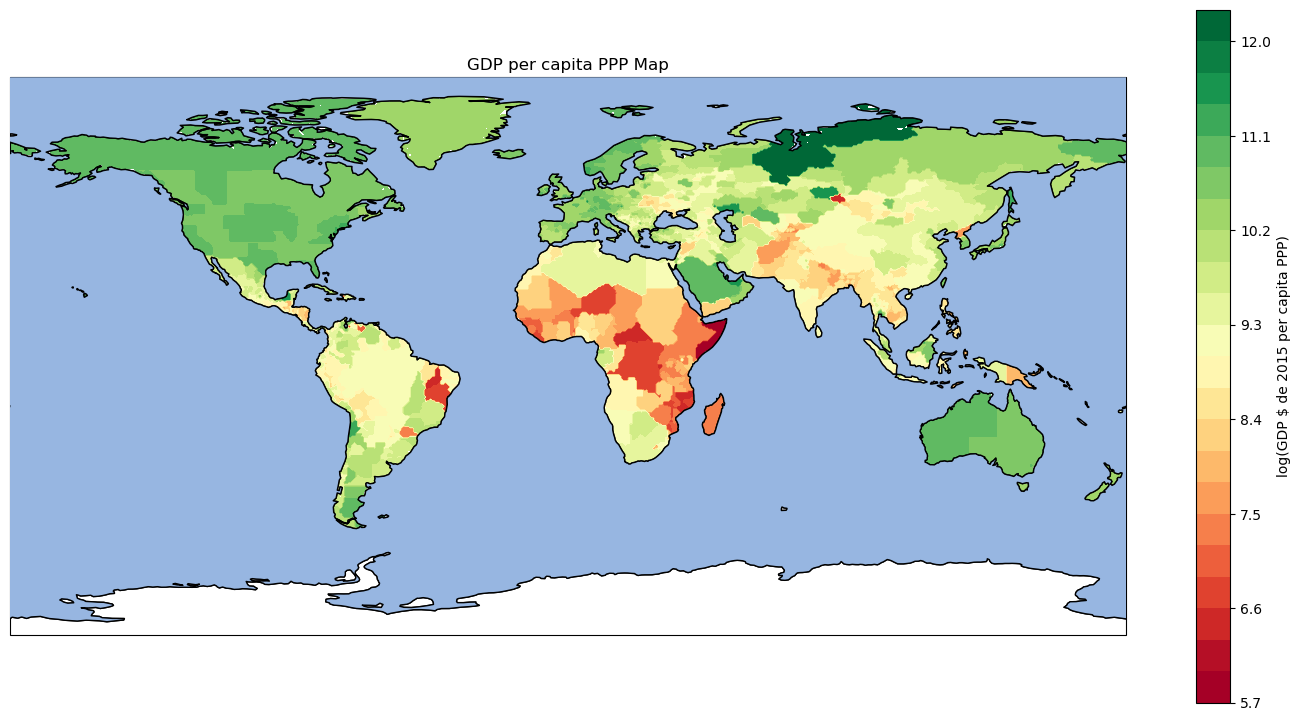

In [14]:
mapplot(np.log(gdpprs_data), lons_gdp, lats_gdp, titl = 'GDP per capita PPP Map', labl = 'log(GDP $ de 2015 per capita PPP)', cmaph = "RdYlGn", maskOcean = True)

# A votre tour !

Two examples of graph construction are given below:
- Lorenz Curve
- Box plot of population density grouped by 4 income categories


Several pieces of code are given below to help you perform calculations on data grids. You can see the material given to you as a set of matrices of the same dimensions and georeferenced in the same way. So: the data in the (i,j) cells of the various matrices always point to the same location. You can therefore work by creating your reflections, indicators and calculations for a specific location, then generalize your calculations by performing term-to-term operations on the matrices.  

Think about a way to graphically represent the distribution of exposure to heat wave hazards, based on vulnerability indicators, and suggest one or two representations. You will then have to present these representations and the path you took to design them to the rest of the class.

In [15]:
### Courbe de Lorenz

# Code a function to get the indices of the ranked values
def get_sorted_indices_1d(arr):
    # Flatten the array and get the indices of the sorted array
    flat_indices = np.argsort(arr, axis=None)
    
    # Convert flat indices to 2D indices
    indices_2d = np.unravel_index(flat_indices, arr.shape)
    
    # Zip the 2D indices to create pairs and then convert to a 1D array of tuples
    sorted_indices_1d = np.array(list(zip(indices_2d[0], indices_2d[1])))
    
    return sorted_indices_1d


# Form the array of the gdp per grid cell (= gdp per capita * population densiy * surface of each gridcell). We need to build the latter

def calculate_global_grid_cell_areas(shape, cell_size):
    """
    Calculate the area of each grid cell in a global raster grid.
    
    Parameters:
    - shape: The shape of the grid (rows, columns). This is calculated based on the entire earth's coverage.
    - cell_size: The size of each grid cell in degrees.
    
    Returns:
    A 2D array where each element represents the area of the corresponding grid cell in square kilometers.
    """
    # Earth's radius in kilometers
    R = 6371.0
    
    # Convert cell size from degrees to radians
    delta_lat_rad = np.radians(cell_size)
    delta_lon_rad = np.radians(cell_size)
    
    # Calculate the total number of rows and columns based on the entire earth's coverage
    rows = int(180 / cell_size)  # From -90 to 90 degrees
    cols = int(360 / cell_size)  # From -180 to 180 degrees
    
    # Initialize an array to hold the area of each cell
    areas = np.zeros((rows, cols))
    
    for i in range(rows):
        # Calculate the latitude at the center of the current row
        lat = -90 + (i + 0.5) * cell_size
        
        # Convert latitude to radians
        lat_rad = np.radians(lat)
        
        # Calculate the area of each cell in this row
        row_area = (R ** 2) * np.cos(lat_rad) * delta_lat_rad * delta_lon_rad
        
        # Assign this area to all cells in the current row
        areas[i, :] = row_area
    
    return areas

# Specify the cell size
cell_size = .5  # Each cell is .5x.5 degree

# Calculate areas for a grid that covers the entire Earth
global_areas = calculate_global_grid_cell_areas(shape=(180, 360), cell_size=cell_size)
print("Global Grid Cell Areas (in square kilometers):")
print(global_areas)

# Let's form the array of gdp per gridcell and the array of population by gridcell

pop_grid = global_areas * poprs_data
gdp_grid = gdpprs_data * pop_grid


Global Grid Cell Areas (in square kilometers):
[[13.48732902 13.48732902 13.48732902 ... 13.48732902 13.48732902
  13.48732902]
 [40.46095996 40.46095996 40.46095996 ... 40.46095996 40.46095996
  40.46095996]
 [67.43150963 67.43150963 67.43150963 ... 67.43150963 67.43150963
  67.43150963]
 ...
 [67.43150963 67.43150963 67.43150963 ... 67.43150963 67.43150963
  67.43150963]
 [40.46095996 40.46095996 40.46095996 ... 40.46095996 40.46095996
  40.46095996]
 [13.48732902 13.48732902 13.48732902 ... 13.48732902 13.48732902
  13.48732902]]


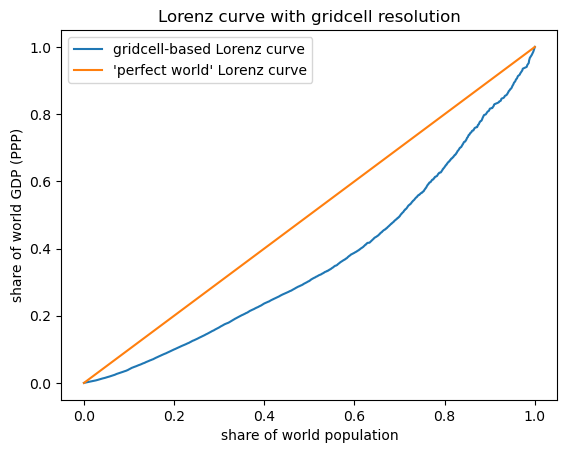

Beware, GDP represents a flow, not a stock. This representation is about share of 'revenue', not 'wealth'


In [16]:
# Get the rank grid of gdp, in order to construct the cumulative curve
ranks_gdp_ids = get_sorted_indices_1d(gdp_grid)

sorted_gdp_data = [gdp_grid[x,y] for x, y in ranks_gdp_ids if not np.isnan(gdp_grid[x,y])]
ranks_gdp_ids_nonan = ranks_gdp_ids[0:len(sorted_gdp_data)] # no nan values anymore at the end of the list

cumul_gdp = [0]
cumul_pop = [0]

count = 0
for idx in ranks_gdp_ids_nonan:
    x, y = idx[0], idx[1]
    if not np.isnan(gdp_grid[x,y]):
        cumul_gdp+= [cumul_gdp[count] + gdp_grid[x,y]]
    else:
        cumul_gdp+= [cumul_gdp[count]]
    if not np.isnan(pop_grid[x,y]):
        cumul_pop+= [cumul_pop[count] + pop_grid[x,y]]
    else:
        cumul_pop+= [cumul_pop[count]]
    count+=1

cpop_norm = np.array(cumul_pop)/cumul_pop[-1]
cgdp_norm = np.array(cumul_gdp)/cumul_gdp[-1]
plt.plot(cpop_norm, cgdp_norm, label = "gridcell-based Lorenz curve")
plt.plot(cpop_norm,cpop_norm, label = "'perfect world' Lorenz curve")
plt.xlabel('share of world population')
plt.ylabel('share of world GDP (PPP)')
plt.title('Lorenz curve with gridcell resolution')
plt.legend(loc = "best")
plt.show()
print("Beware, GDP represents a flow, not a stock. This representation is about share of 'revenue', not 'wealth'")

Violin plot of exposure compared to levels of gdp

Let us produce box plots of population according to levels of revenue

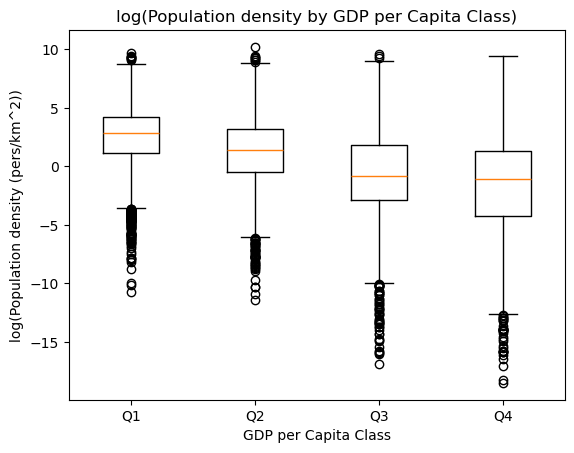

In [17]:
# Get the rank grid of gdp, in order to construct the cumulative curve
ranks_gdp_ids = get_sorted_indices_1d(gdpprs_data)

sorted_gdp_data = [gdpprs_data[x,y] for x, y in ranks_gdp_ids if not np.isnan(gdpprs_data[x,y])] #we discard the np.nan values, no pb of order because the np.nan values are at the end

quant_pop = len(sorted_gdp_data)//4 # get the quantile population, here we take 4 quantiles


# Step 3: Classify GDP data into 4 quantiles
indices_classes = [[[x,y] for x,y in  ranks_gdp_ids[i*quant_pop:(i+1)*quant_pop]] for i in range(4)]  # Returns a list containing 4 lists of the indices of the quantiles

# Step 4: Associate Population Density with gdp classes
pop_by_gdp_class = [[np.log(poprs_data[x,y]) for x,y in indices_classes[i] if not np.isnan(poprs_data[x,y])] for i in range(4)]  # Create the lists for the box plots

# Step 5: Plot the data
fig, ax = plt.subplots()
ax.boxplot(pop_by_gdp_class)
ax.set_title('log(Population density by GDP per Capita Class)')
ax.set_xlabel('GDP per Capita Class')
ax.set_ylabel('log(Population density (pers/km^2))')
ax.set_xticks([y + 1 for y in range(len(pop_by_gdp_class))],
                  labels=['Q1', 'Q2', 'Q3', 'Q4'])

plt.show()